<a href="https://colab.research.google.com/github/rredd002/Stock-Price-Predictions/blob/main/Stock_Price_Prediction_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **STOCK PRICE PREDICTIONS**

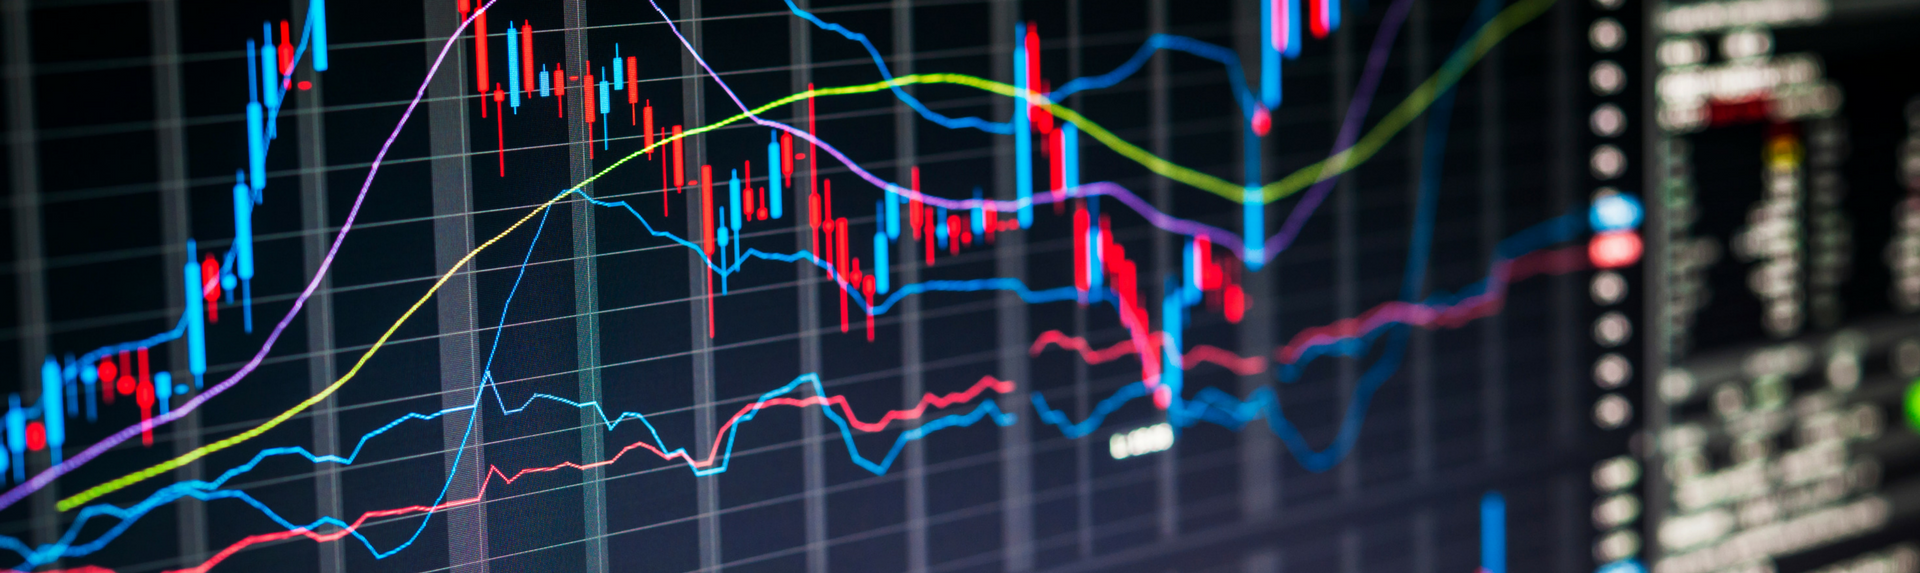

### **ABSTRACT**

Stock price prediction has long been a challenging and sought after task in financial markets. With the availability of historical stock data and the advent of new machine learning techniques, there are increasingly new ways to make stock forecasts. This project will look at Long Short-Term Memory Networks (LSTM) and how they are major improvements over Simple Moving Average (SMA) models.  

First, we will gather 20 years of data for Amazon's stock price. Then we will calculate 50 day and 200 day moving average data as a baseline to compare to our LSTM models.  

We will then build our LSTM models. Root mean squared error will be used as our metric for determining how well our model performs. We will also explore the effect certain hyperparameter have on the performance of our model; more specifically the following 2 hyperparameters: # of epochs and batch size.  

The results reveal that LSTM models tend to outperform SMA in capturing day to day trends. LSTM models showcase improved accuracy and adaptability, especially in the presence of abrupt market shifts. However, it is noted that LSTM models can be sensitive to the choice of hyperparameters and require more computational resources compared to the simplicity of SMA.

## **BUSINESS PROBLEM**  

A financial services company is seeking to enhance their portfolio management strategies by accurately predicting stock prices. They are looking to develop a robust and reliable stock price prediction model that can provide actionable insights for their investment decisions. The company manages a diverse portfolio of stocks for their clients and aims to maximize returns while minimizing risks.

## **DATA OVERVIEW**  

We used a dataset for Amazon stock prices which had 20 years of data from 2000-2020. The data was available on AWS and contained 5200 stock price data points.

### **DATA LIMITATIONS**  



*   Data only through 2020
*   Only for Amazon stock
*   Did not include variables such as market sentiment, economic indicators, or global events






### **EXPLORATORY DATA ANALYSIS**

In [ ]:
# import relevant packages

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
import tensorflow as tf
from keras.layers import Dense, LSTM, Dropout

In [ ]:
# Read in Amazon stock prices csv file
df = pd.read_csv('daily_adjusted_AMZN.csv')

In [ ]:
# Sort by date
df.sort_values('timestamp', inplace=True)

In [ ]:
df.head()

,timestamp,open,high,low,close,adjusted_close,volume,dividend_amount,split_coefficient
5199,2000-01-03,81.50,89.56,80.00,89.38,89.38,16117600,0.0,1.0
5198,2000-01-04,85.38,91.50,81.75,81.94,81.94,17487400,0.0,1.0
5197,2000-01-05,70.75,75.13,69.63,71.75,71.75,38457400,0.0,1.0
5196,2000-01-06,71.31,72.69,64.00,65.56,65.56,18752000,0.0,1.0
5195,2000-01-07,67.00,70.50,66.19,69.56,69.56,10505400,0.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5200 entries, 5199 to 0
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   timestamp          5200 non-null   object 
 1   open               5200 non-null   float64
 2   high               5200 non-null   float64
 3   low                5200 non-null   float64
 4   close              5200 non-null   float64
 5   adjusted_close     5200 non-null   float64
 6   volume             5200 non-null   int64  
 7   dividend_amount    5200 non-null   float64
 8   split_coefficient  5200 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 406.2+ KB


In [ ]:
# Convert timestamp column to datetime format
df['timestamp'] = pd.to_datetime(df['timestamp'])

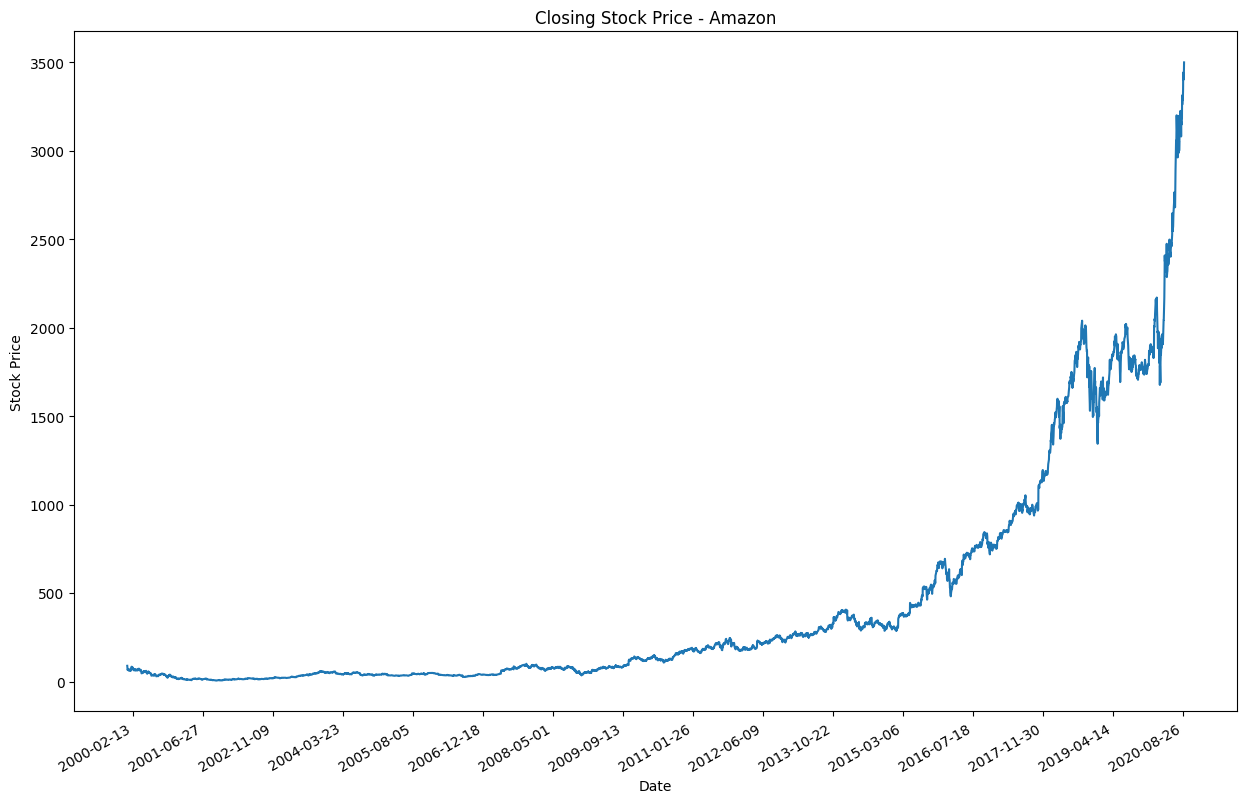

In [ ]:
# Plot closing price trend

fig, ax = plt.subplots(figsize= (15,10))

ax.plot(df['timestamp'], df['close'])
ax.set_title('Closing Stock Price - Amazon')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Set the maximum number of ticks
plt.gcf().autofmt_xdate()

In [ ]:
# Create new column of average price per day
df['average'] = (df['high'] + df['low'])/2

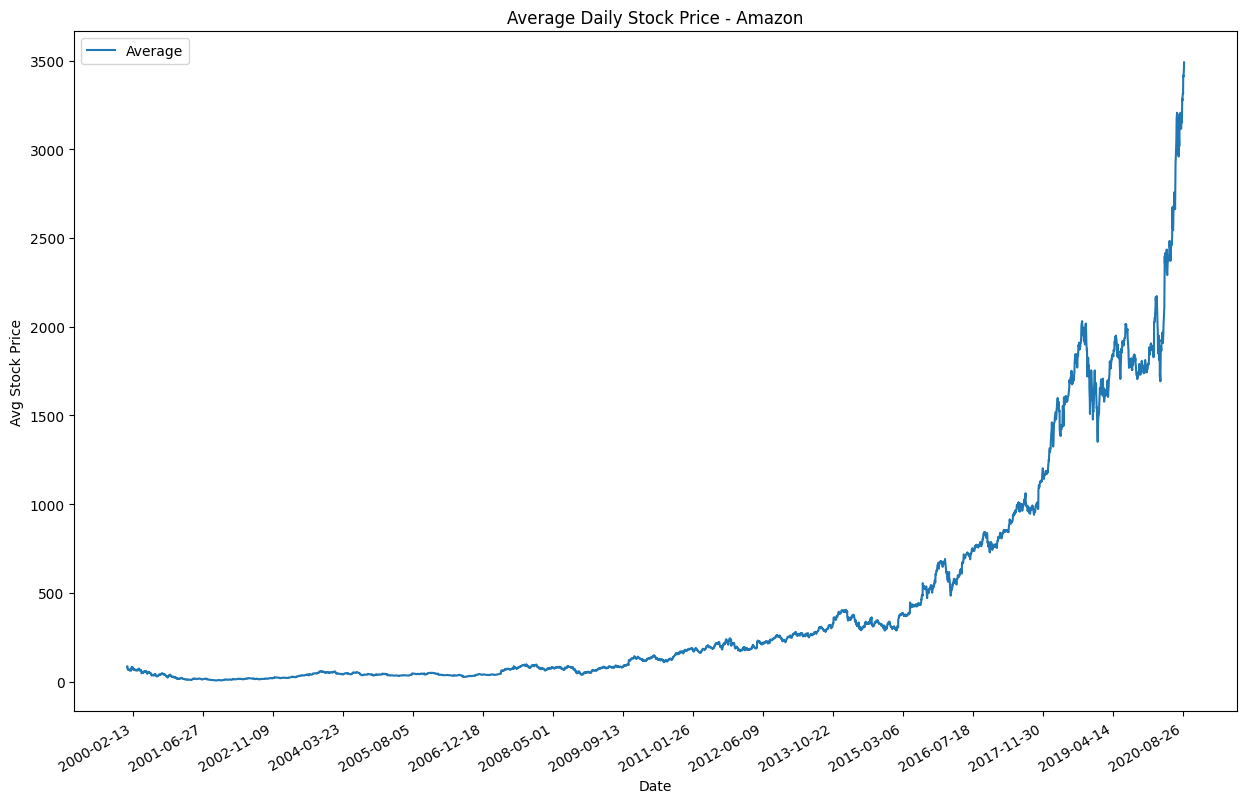

In [ ]:
# Plot average price per day
fig, ax = plt.subplots(figsize= (15,10))
ax.plot(df['timestamp'], df['average'], label='Average')
ax.set_title('Average Daily Stock Price - Amazon')
ax.set_xlabel('Date')
ax.set_ylabel('Avg Stock Price')
ax.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Set the maximum number of ticks
plt.gcf().autofmt_xdate()

MOVING AVERAGE MODELING

In [ ]:
# Create new columns of rolling average prices for 10 days, 20 days, and 50 days
ma_day = [10, 20, 50]

for ma in ma_day:
    column_name = f"MA for {ma} days"
    df[column_name] = df['close'].rolling(ma).mean()

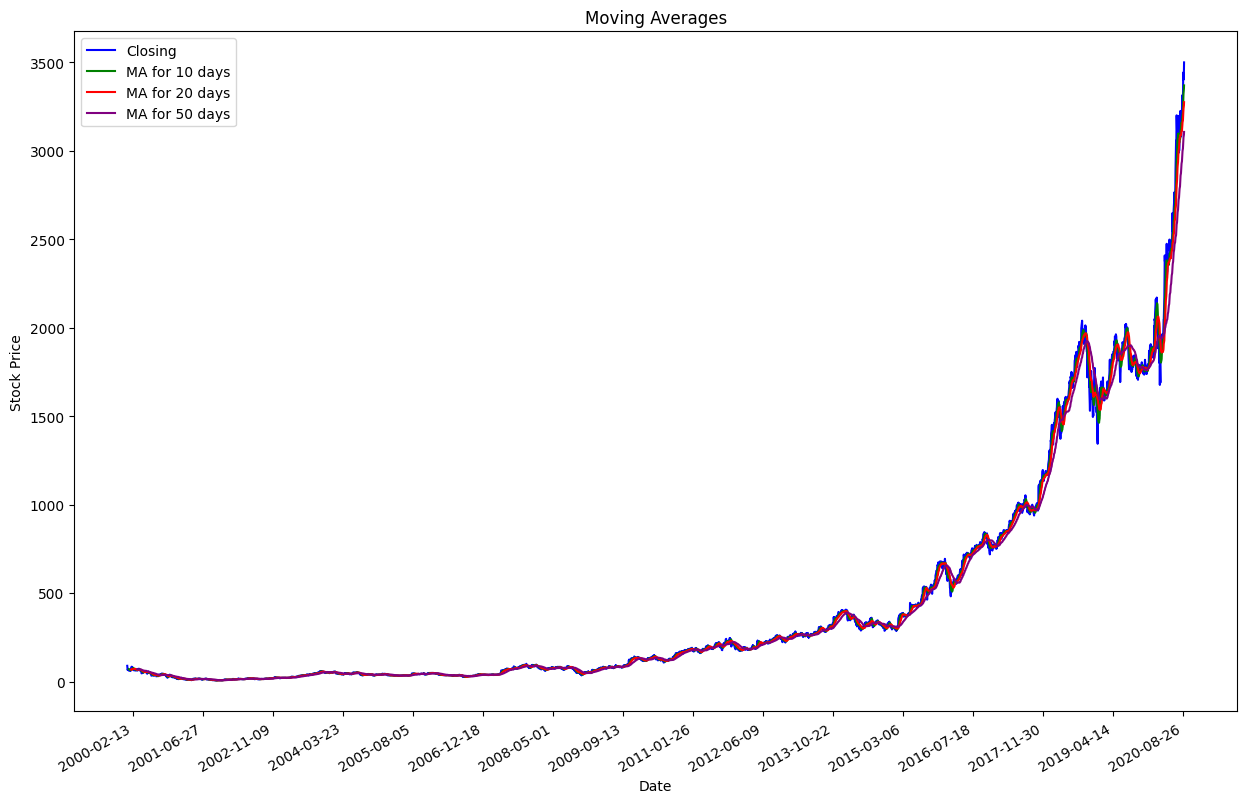

In [ ]:
# Plot moving average prices vs actual closing price
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(df['timestamp'], df['close'], label='Closing', color='blue')
ax.plot(df['timestamp'],df['MA for 10 days'], label='MA for 10 days', color='green')
ax.plot(df['timestamp'],df['MA for 20 days'], label='MA for 20 days', color='red')
ax.plot(df['timestamp'],df['MA for 50 days'], label='MA for 50 days', color='purple')
ax.set_title('Moving Averages')
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')
ax.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Set the maximum number of ticks
plt.gcf().autofmt_xdate()

In [ ]:
# Create new column of just the year
df['year'] = df['timestamp'].dt.year

In [ ]:
# Create new dataframe of prices after 2018 to get a closer look at the moving averages vs price
af = df.loc[df['year'] > 2018]

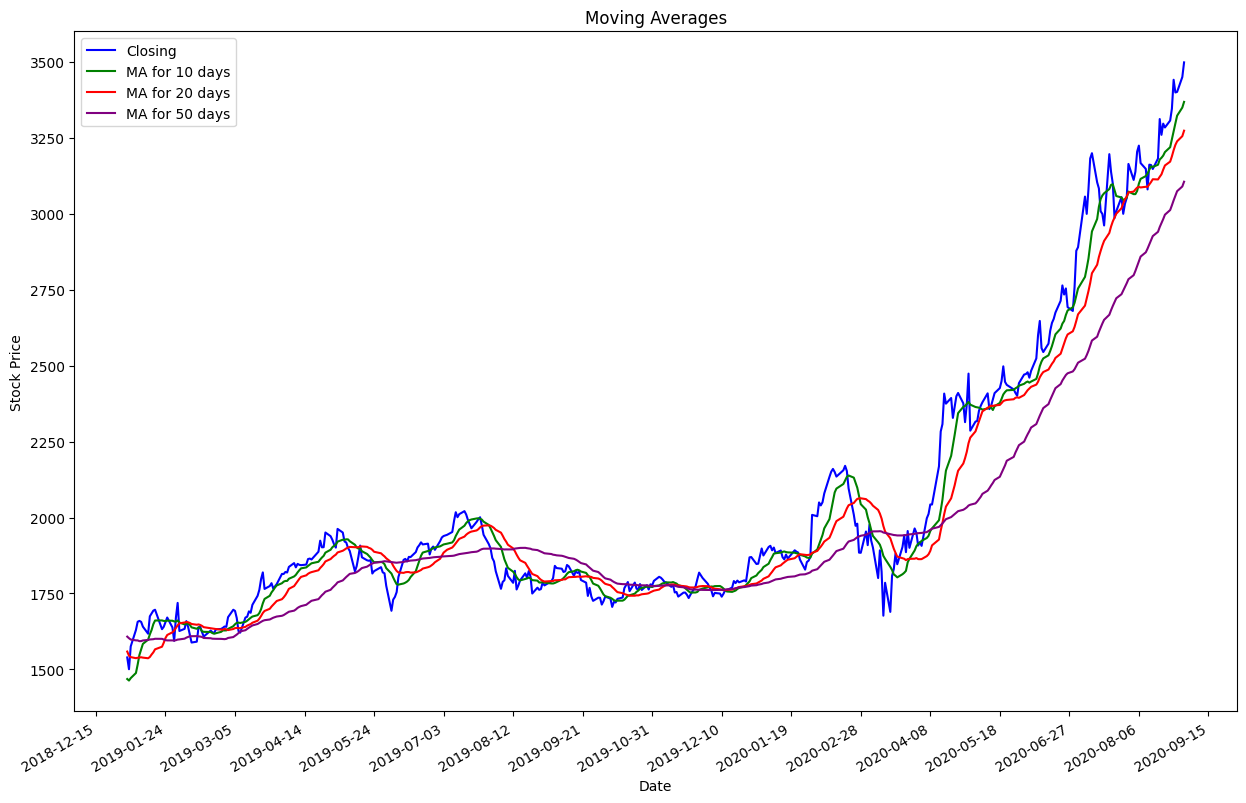

In [ ]:
# Plotting the moving averages vs closing price
fig, ax = plt.subplots(figsize = (15,10))
ax.plot(af['timestamp'], af['close'], label='Closing', color='blue')
ax.plot(af['timestamp'],af['MA for 10 days'], label='MA for 10 days', color='green')
ax.plot(af['timestamp'],af['MA for 20 days'], label='MA for 20 days', color='red')
ax.plot(af['timestamp'],af['MA for 50 days'], label='MA for 50 days', color='purple')
ax.set_title('Moving Averages')
ax.set_ylabel('Stock Price')
ax.set_xlabel('Date')
ax.legend()
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))  # Set the maximum number of ticks
plt.gcf().autofmt_xdate()

In [ ]:
# Create a new dataframe of relevant columns for baseline model
df_main = df[['timestamp', 'close', 'average']]

In [ ]:
# Create a 50 day rolling average column
df_main['50day'] = df_main['close'].rolling(50).mean()

<ipython-input-17-efc92c76b392>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['50day'] = df_main['close'].rolling(50).mean()


In [ ]:
# Create a 200 day rolling average column
df_main['200day'] = df_main['close'].rolling(200).mean()

<ipython-input-18-9383322f8378>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_main['200day'] = df_main['close'].rolling(200).mean()


In [ ]:
# Create a training set of 80% of the data
train_percentage = 0.8
split_index = int(df.shape[0]*train_percentage)

In [ ]:
# Create a dataframe of the 20% testing data
df_main_test = df_main.iloc[split_index :, :]

In [ ]:
def calculate_rmse(y_true, y_pred):
    """
    Calculate the Root Mean Squared Error (RMSE)
    """
    rmse = np.sqrt(np.mean((y_true - y_pred) ** 2))
    return rmse

In [ ]:
def calculate_perf_metrics(var):
    '''
      RMSE of the actual closing price compared rolling average specified by var
    '''
    rmse = calculate_rmse(
        np.array(df_main[split_index:]["close"]),
        np.array(df_main[split_index:][var]),
    )

    return rmse

In [ ]:
# Calculating the RMSE of the 50 day rolling average model
rmse_sma = calculate_perf_metrics(var='50day')
print(rmse_sma)

135.3946009147824


In [ ]:
# Calculating the RMSE of the 200 day rolling average model
calculate_perf_metrics(var='200day')

304.87960308309135

In [ ]:
# Creating series variables for date, 50 day, 200 day, close, and average
date = df_main_test['timestamp']
sma_50 = df_main_test['50day']
sma_200 = df_main_test['200day']
close = df_main_test['close']
avg = df_main_test['average']

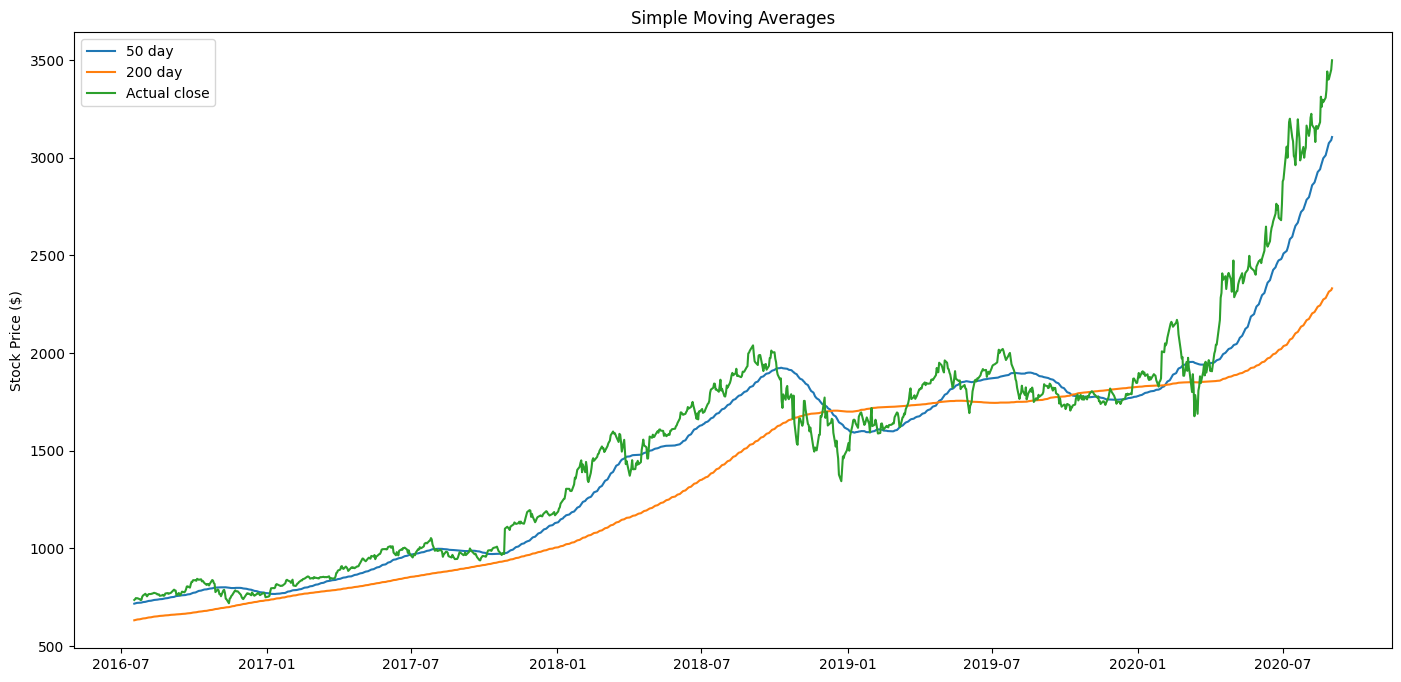

In [ ]:
# Plotting the closing value price vs the rolling average predictions on the test data
fig, ax = plt.subplots(figsize= (17,8))
ax.plot(date, sma_50, label='50 day')
ax.plot(date, sma_200, label='200 day')
ax.plot(date, close, label='Actual close')
plt.grid(False)
plt.title('Simple Moving Averages')
plt.axis('tight')
plt.ylabel('Stock Price ($)')
plt.legend()

LSTM MODELING

In [ ]:
# Creating numpy arrays for high price, low price, and average price
high_prices = df.loc[:, 'high'].values
low_prices = df.loc[:, 'low'].values
mid_prices = df.loc[:, 'average'].values

In [ ]:
# Reshaping the mid price array
mid_prices = mid_prices.reshape(-1, 1)

In [ ]:
# Creating a MinMaxScaler object and scaling the mid prices array
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(mid_prices)

In [ ]:
scaled_data

array([[0.02266381],
       [0.02319328],
       [0.01910533],
       ...,
       [0.97689854],
       [0.98839619],
       [1.        ]])

In [ ]:
# Creating the train test splits based on the split index variable
train = scaled_data[:split_index]
test = scaled_data[split_index-60:, :]

In [ ]:
# Creating the training dataset from the scaled data

x_train = []
y_train = []

for i in range(60, len(train)):
    x_train.append(train[i-60:i])
    y_train.append(train[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)
print(x_train.shape, y_train.shape)

# Reshape the data
##x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([[0.02266381],
       [0.02319328],
       [0.01910533],
       [0.01794739],
       [0.01794739],
       [0.01816262],
       [0.01770489],
       [0.01713094],
       [0.01703337],
       [0.01734617],
       [0.01672774],
       [0.0170592 ],
       [0.01712233],
       [0.01621693],
       [0.0185486 ],
       [0.01802774],
       [0.01766902],
       [0.01732896],
       [0.01647664],
       [0.01601031],
       [0.01770633],
       [0.01842233],
       [0.02176845],
       [0.02139969],
       [0.01985864],
       [0.02092475],
       [0.02183015],
       [0.02062916],
       [0.02052155],
       [0.0197582 ],
       [0.01940091],
       [0.01900632],
       [0.01832332],
       [0.0174007 ],
       [0.01692432],
       [0.01791151],
       [0.0179933 ],
       [0.01764319],
       [0.01717686],
       [0.01768337],
       [0.01748966],
       [0.01658426],
       [0.01652973],
       [0.01699607],
       [0.01669187],
       [0.0163145 ],
       [0.01715821],
       [0.01

In [ ]:
# Creating an initial LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=5)

Epoch 1/5
4100/4100 [==============================] - 192s 46ms/step - loss: 5.2967e-05
Epoch 2/5
4100/4100 [==============================] - 189s 46ms/step - loss: 3.3429e-05
Epoch 3/5
4100/4100 [==============================] - 189s 46ms/step - loss: 1.4572e-05
Epoch 4/5
4100/4100 [==============================] - 190s 46ms/step - loss: 1.8324e-05
Epoch 5/5
4100/4100 [==============================] - 186s 45ms/step - loss: 1.1376e-05


In [ ]:
# Create the data sets x_test and y_test
x_test = []
y_test = []
y_test = mid_prices[split_index:, :]
for i in range(60, len(test)):
    x_test.append(test[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)
##y_test = np.array(y_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

##y_test = y_test.reshape(-1, 1)
y_test_inv = scaler.inverse_transform(y_test)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
mse = mean_squared_error(y_test, predictions, squared=False)
print(rmse, mse)

33/33 [==============================] - 2s 42ms/step
96.3923558648013 96.3923558648013


In [ ]:
# Creating a function to quickly run LSTM models
def run_LSTM_model(num_epoch, num_neurons_1, num_neurons_2, batch_size):
    ''' Creates a model using these variables:
        num_epoch - number of epochs to fit the model
        num_neurons_1 - number of units for the first level of neural net
        num_neurons_2 - number of units for the second level of neural net
        batch_size - batch size when fitting the model

        Then plots how the model performs
    '''
    mdl = Sequential()
    mdl.add(LSTM(num_neurons_1, return_sequences=True, input_shape=(x_train.shape[1], 1)))
    mdl.add(LSTM(num_neurons_2, return_sequences=False))
    mdl.add(Dense(25))
    mdl.add(Dense(1))

# Compile the model
    mdl.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
    mdl.fit(x_train, y_train, batch_size=batch_size, epochs=num_epoch)
    preds = mdl.predict(x_test)
    preds = scaler.inverse_transform(preds)

    # Get the root mean squared error (RMSE)
    rmse = mean_squared_error(y_test, preds, squared=False)

    # Getting the coordinates to place text inside the plot
    date_center = date[len(date)/2]
    y_point = max(preds) - 200

    # Plotting the predicted prices vs the average prices
    fig, ax = plt.subplots(figsize=(17,8))
    ax.plot(date, avg, label='Actual Price')
    ax.plot(date, preds, label='Predicted Price')
    ax.text(date_center, y_point, f'RMSE = {rmse}', ha='center', va='center', fontsize=12, color='red')
    plt.grid(False)
    plt.title(f'Actual Price vs Predicted with Batch Size of {batch_size}')
    plt.axis('tight')
    plt.ylabel('Stock Price ($)')
    plt.legend()

    return rmse

Epoch 1/15
820/820 [==============================] - 40s 45ms/step - loss: 2.9609e-05
Epoch 2/15
820/820 [==============================] - 43s 53ms/step - loss: 1.6627e-05
Epoch 3/15
820/820 [==============================] - 42s 51ms/step - loss: 1.0190e-05
Epoch 4/15
820/820 [==============================] - 42s 51ms/step - loss: 9.1341e-06
Epoch 5/15
820/820 [==============================] - 43s 52ms/step - loss: 7.9028e-06
Epoch 6/15
820/820 [==============================] - 43s 52ms/step - loss: 6.9997e-06
Epoch 7/15
820/820 [==============================] - 43s 52ms/step - loss: 8.3481e-06
Epoch 8/15
820/820 [==============================] - 44s 53ms/step - loss: 5.9810e-06
Epoch 9/15
820/820 [==============================] - 43s 52ms/step - loss: 6.4828e-06
Epoch 10/15
820/820 [==============================] - 47s 58ms/step - loss: 5.6832e-06
Epoch 11/15
820/820 [==============================] - 48s 59ms/step - loss: 4.6725e-06
Epoch 12/15
820/820 [====================

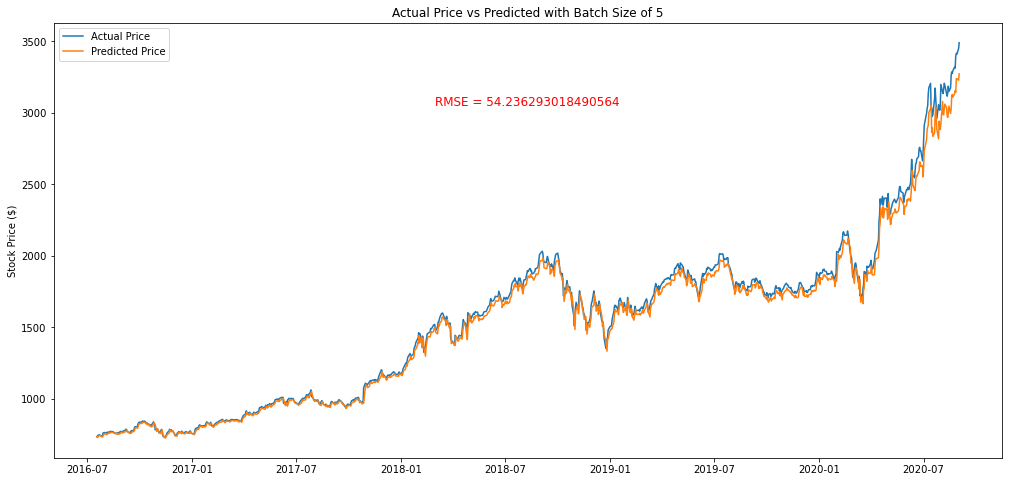

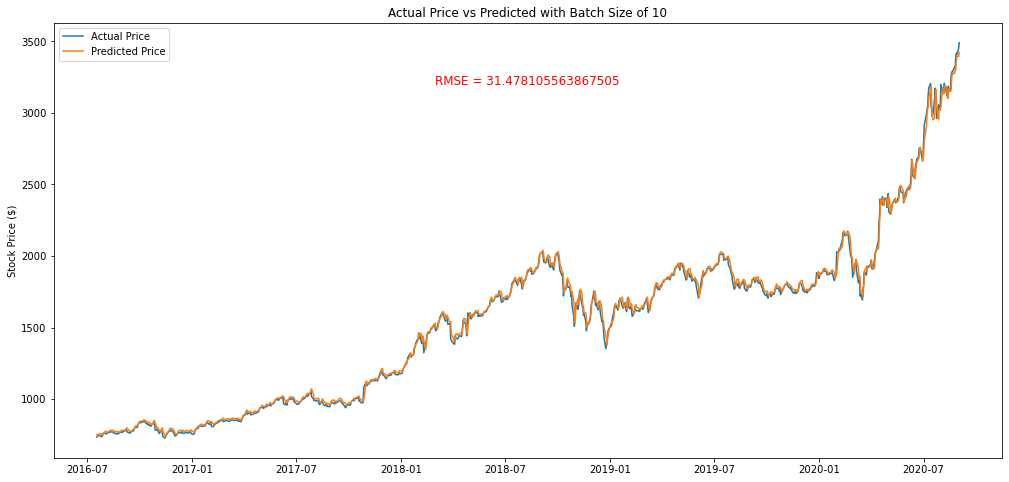

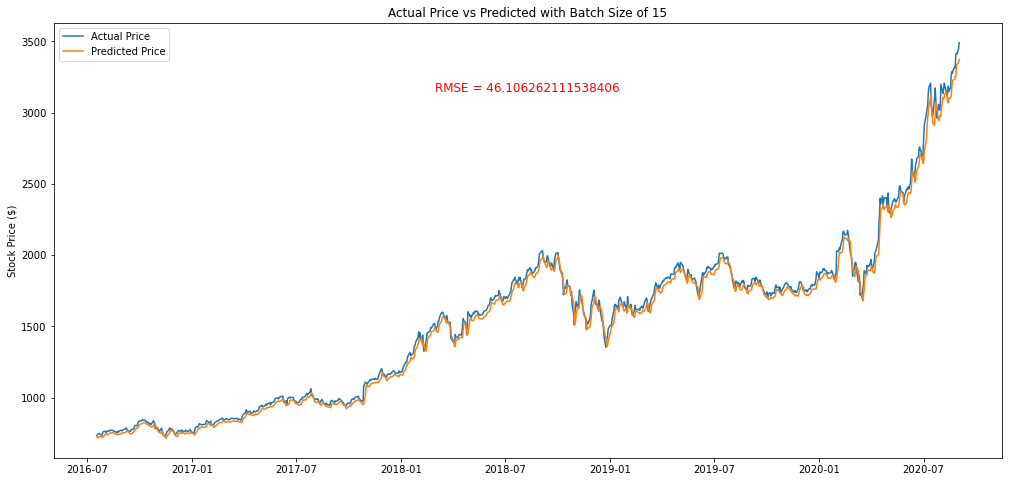

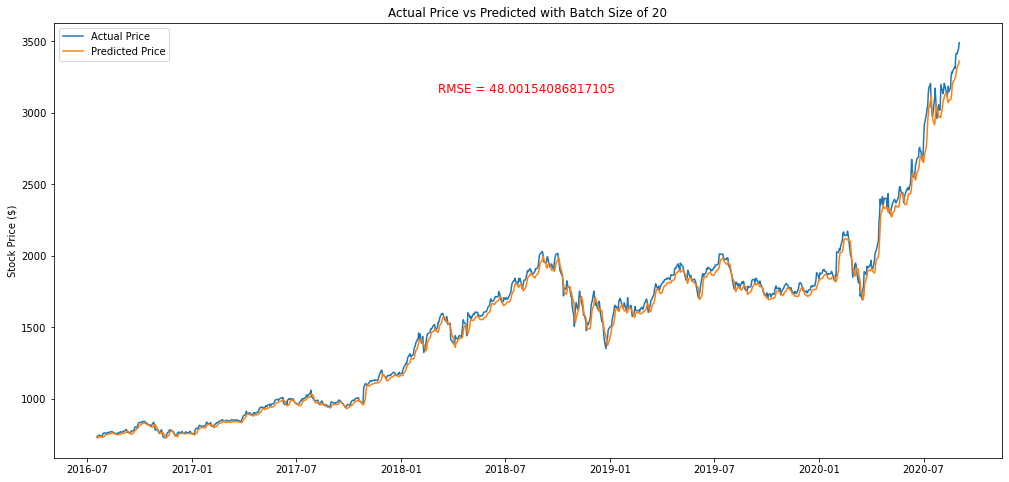

In [ ]:
# Running LSTM models for the 4 batch sizes
batch_list = [5, 10, 15, 20]

for i in batch_list:
    run_LSTM_model(15, 168, 63, i)

CONCLUSIONS